# 5章　線形回帰

In [1]:
# PDF印刷用
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

try:
    from google.colab import files
except:
    pass

pdf_ind = 1
pdf_base = 'pdf-05-'

def create_pdf(plt):
    global pdf_ind, pdf_base
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fn)
    plt.savefig(fn)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1

def graph_pdf(g):
    global pdf_ind, pdf_base
    fnbase = f'{pdf_base}{pdf_ind:02d}'
    fn = f'{pdf_base}{pdf_ind:02d}.pdf'
    print(fnbase)
    g.render(fnbase, view=False)
    try:
        files.download(fn)
    except:
        pass
    pdf_ind = pdf_ind + 1


In [29]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [5]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [7]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

## 5.3 線形関数(nn.Linear)

###  入力:1 出力:1 の線形関数

In [8]:
# 入力:1 出力:1 の線形関数の定義
l1 = nn.Linear(1, 1)

# 線形関数の表示
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [9]:
# パラメータ名、パラメータ値、shapeの表示

for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.3773]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.5640], requires_grad=True)
shape:  torch.Size([1])


In [10]:
# 初期値設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

# 結果確認
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [11]:
# テスト用データ生成

# x_npをnumpy配列で定義
x_np = np.arange(-2, 2.1, 1)

# Tensor化
x = torch.tensor(x_np).float()

# サイズを(N,1)に変更
x = x.view(-1,1)

# 結果確認
print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [12]:
# 1次関数のテスト

y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


### 入力:2 出力:1 の線形関数

In [13]:
# 入力:2 出力:1 の線形関数の定義
l2 = nn.Linear(2, 1)

# 初期値設定
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

# 結果確認
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [14]:
# 2次元numpy配列
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1,1]])

# Tensor化
x2 =  torch.tensor(x2_np).float()

# 結果確認
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [15]:
# 関数値計算
y2 = l2(x2)

# shape確認
print(y2.shape)

# 値確認
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


### 入力:2 出力:3 の線形関数

In [16]:
# 入力:2 出力:3 の線形関数の定義

l3 = nn.Linear(2, 3)

# 初期値設定
nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

# 結果確認
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [17]:
# 関数値計算
y3 = l3(x2)

# shape確認
print(y3.shape)

# 値確認
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


## 5.6 データ準備
UCI公開データセットのうち、回帰でよく使われる「ボストン・データセット」を用いる。  

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

オリジナルのデーセットは、17項目の入力値から、不動産価格を予測する目的のものだが、
一番単純な「単回帰モデル」(1入力)のモデルを作るため、このうち``RM``の1項目だけを抽出する。


In [18]:
# 学習用データ準備

# ライブラリのインポート
from sklearn.datasets import load_boston

# データ読み込み
boston = load_boston()

# 入力データと正解データ取得
x_org, yt = boston.data, boston.target

# 項目名リスト取得
feature_names = boston.feature_names

# 結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
# データ絞り込み (項目 RMのみ)
x = x_org[:,feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5,:])

# 正解データ yの表示
print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


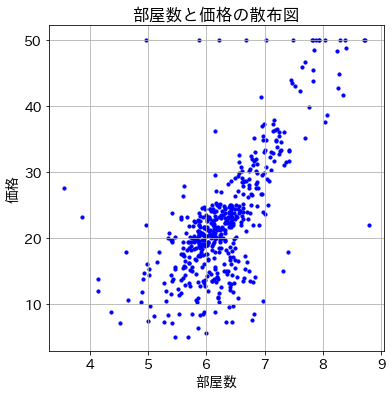

In [20]:
# 散布図の表示

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()

## 5.7 モデル定義

In [21]:
# 変数定義

# 入力次元数
n_input= x.shape[1]

# 出力次元数
n_output = 1

print(f'入力次元数: {n_input}  出力次元数: {n_output}')

入力次元数: 1  出力次元数: 1


#### 備考　以下の2つのセルは4.2解説用

In [22]:
# モデルの定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(n_input, n_output)   
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [23]:
# インスタンスの生成
# １入力1出力の線形モデル

n_input = 1
n_output = 1

net = Net(n_input, n_output)

In [24]:
# モデルの定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(n_input, n_output)   
        
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [25]:
# インスタンスの生成
# １入力1出力の線形モデル

net = Net(n_input, n_output)

In [26]:
# モデル内のパラメータの確認
# モデル内の変数取得にはnamed_parameters関数を利用する
# 結果の第1要素が名前、第2要素が値
# 
# predict.weightとpredict.biasがあることがわかる
# 初期値はどちらも1.0になっている

for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [27]:
# パラメータのリスト取得にはparameters関数を利用する

for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


### モデル確認

In [28]:
# モデルの概要表示

print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [30]:
# モデルのサマリー表示

from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### 最適化アルゴリズムと損失関数

In [31]:
# 学習率
lr = 0.01

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

## 5.8 勾配降下法

In [32]:
# 入力変数x と正解値 ytのテンソル変数化

inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

# 次元数確認

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [33]:
# 損失値計算用にlabels変数を(N,1)次元の行列に変換する

labels1 = labels.view((-1, 1))

# 次元数確認
print(labels1.shape)

torch.Size([506, 1])


In [34]:
# 予測値の計算

outputs = net(inputs)

In [35]:
#  損失値の計算
loss = criterion(outputs, labels1)

# 損失値の取得
print(f'{loss.item():.5f}')

308.44986


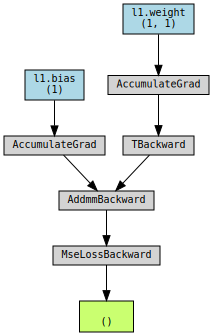

In [36]:
# 損失関数のグラフ化

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [37]:
graph_pdf(g)

pdf-05-01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# 予測値の計算
outputs = net(inputs)

#  損失値の計算
loss = criterion(outputs, labels1)

# 勾配計算
loss.backward()

# 勾配の結果が取得可能に
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [39]:
# 重みの修正
optimizer.step()

# 重みとバイアス値が変わる
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [40]:
# 勾配値の初期化
optimizer.zero_grad()

# 勾配値がすべてゼロになっている
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[0.]])
tensor([0.])


### 繰り返し計算

In [41]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [42]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90057
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56715
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94655
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69226
Epoch 3100 loss: 25.59978
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42136
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

# 5.9 結果確認

In [43]:
# 最終的な損失関数初期値、最終値

print(f'損失関数初期値: {history[0,1]:.5f}')
print(f'損失関数最終値: {history[-1,1]:.5f}')

損失関数初期値: 154.22493
損失関数最終値: 21.80033


pdf-05-02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

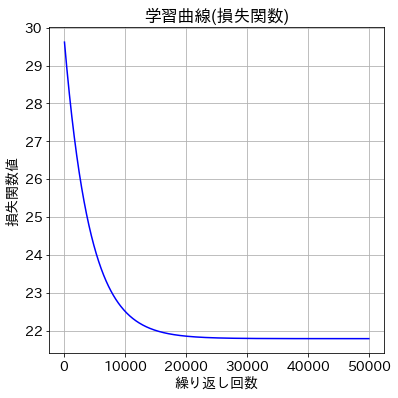

In [44]:
# 学習曲線の表示 (損失関数) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失関数値')
plt.title('学習曲線(損失関数)')
create_pdf(plt)
plt.show()

In [45]:
# 回帰直線の算出

# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2189]
 [45.2121]]


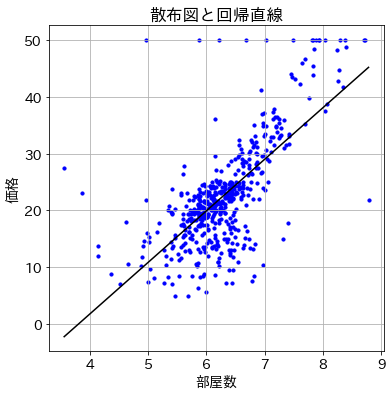

In [46]:
# 散布図と回帰直線の描画

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

## 5.10 重回帰モデルへの拡張

In [47]:
# 列(LSTAT: 低所得者率)の追加

x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

# shapeの表示
print(x2.shape)

# 入力データxの表示
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [48]:
# 今度は入力次元数=2

n_input = x2.shape[1]
print(n_input)

# モデルインスタンスの生成
net = Net(n_input, n_output)

2


In [49]:
# モデル内のパラメータの確認
# predict.weight が2次元に変わった

for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1., 1.]])
変数名: l1.bias
変数値: tensor([1.])


In [50]:
# モデルの概要表示

print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [51]:
# モデルのサマリー表示

from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [52]:
# 入力変数x2 のテンソル変数化 
# labels, labels1は前のものをそのまま利用

inputs = torch.tensor(x2).float()

### くり返し計算

In [53]:
# 初期化処理

# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [54]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 3753837073642659568666615480320.00000
Epoch 200 loss: inf
Epoch 300 loss: nan
Epoch 400 loss: nan
Epoch 500 loss: nan
Epoch 600 loss: nan
Epoch 700 loss: nan
Epoch 800 loss: nan
Epoch 900 loss: nan
Epoch 1000 loss: nan
Epoch 1100 loss: nan
Epoch 1200 loss: nan
Epoch 1300 loss: nan
Epoch 1400 loss: nan
Epoch 1500 loss: nan
Epoch 1600 loss: nan
Epoch 1700 loss: nan
Epoch 1800 loss: nan
Epoch 1900 loss: nan
Epoch 2000 loss: nan
Epoch 2100 loss: nan
Epoch 2200 loss: nan
Epoch 2300 loss: nan
Epoch 2400 loss: nan
Epoch 2500 loss: nan
Epoch 2600 loss: nan
Epoch 2700 loss: nan
Epoch 2800 loss: nan
Epoch 2900 loss: nan
Epoch 3000 loss: nan
Epoch 3100 loss: nan
Epoch 3200 loss: nan
Epoch 3300 loss: nan
Epoch 3400 loss: nan
Epoch 3500 loss: nan
Epoch 3600 loss: nan
Epoch 3700 loss: nan
Epoch 3800 loss: nan
Epoch 3900 loss: nan
Epoch 4000 loss: nan
Epoch 4100 loss: nan
Epoch 4200 loss: nan
Epoch 4300 loss: nan
Epoch 4400 loss: nan
Epoch 4500 loss: nan
Epoch 

## 5.11 学習率の変更

In [55]:
# 繰り返し回数
#num_epochs = 50000
num_epochs = 2000

# 学習率
#l r = 0.01
lr = 0.001

# モデルインスタンスの生成
net = Net(n_input, n_output)

# アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 最小二乗誤差
criterion = nn.MSELoss()

In [56]:
# 繰り返し計算メインループ

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測
    outputs = net(inputs)
  
    # 誤差計算
    loss = criterion(outputs, labels1) / 2.0

    #勾配計算
    loss.backward()

    # 勾配降下法の適用
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 112.06398
Epoch 100 loss: 25.35892
Epoch 200 loss: 16.39105
Epoch 300 loss: 15.40301
Epoch 400 loss: 15.29414
Epoch 500 loss: 15.28211
Epoch 600 loss: 15.28076
Epoch 700 loss: 15.28059
Epoch 800 loss: 15.28054
Epoch 900 loss: 15.28051
Epoch 1000 loss: 15.28048
Epoch 1100 loss: 15.28046
Epoch 1200 loss: 15.28043
Epoch 1300 loss: 15.28040
Epoch 1400 loss: 15.28037
Epoch 1500 loss: 15.28034
Epoch 1600 loss: 15.28031
Epoch 1700 loss: 15.28028
Epoch 1800 loss: 15.28026
Epoch 1900 loss: 15.28023


In [57]:
# 最終的な損失関数初期値、最終値

print(f'損失関数初期値: {history[0,1]:.5f}')
print(f'損失関数最終値: {history[-1,1]:.5f}')

損失関数初期値: 112.06398
損失関数最終値: 15.28023


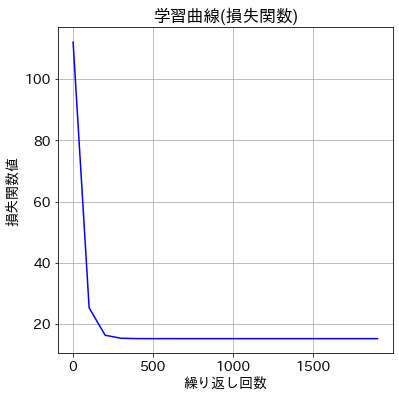

In [58]:
# 学習曲線の表示 (損失関数)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失関数値')
plt.title('学習曲線(損失関数)')
plt.show()

### 補足
下記の解説をコラムにする??

https://github.com/pytorch/pytorch/blob/v1.3.0/torch/nn/modules/module.py#L531